## f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

1. Определить корни

2. Найти интервалы, на которых функция возрастает

3. Найти интервалы, на которых функция убывает

4. Построить график

5. Вычислить вершину

6. Определить промежутки, на котором f > 0

7. Определить промежутки, на котором f < 0

In [193]:
from sympy import Symbol, simplify, plot, pi, diff, Interval
from sympy.solvers import solve, solveset
from sympy import S, sin, cos

#### 0. Задаем функцию

In [194]:
x = Symbol('x', real = True)
y = (sin(x)/2 + cos(x)/2)**2 * sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

#### 1. Определяем корни

In [195]:
roots = solve(y, x)
roots

[0, -pi/4, 3*pi/4, pi]

#### 2. Ищем интервалы, на которых функция возрастает

##### 2.1 Вычисляем производную

In [196]:
y_diff = diff(y, x)
y_diff

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

###### 2.2 Определяем корни производной

In [197]:
extremum = solve(y_diff, x)
extremum

[-pi/4,
 3*pi/4,
 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)]

In [198]:
extremum_light = []
for i in extremum:
    extremum_light.append(round(i.evalf(),2))
extremum_light

[-0.79, 2.36, -2.08, 2.87, 1.06, -0.27]

###### 2.3 Добавляем границы интервала

In [199]:
extremum_light.insert(0, -pi)
extremum_light.append(pi)
extremum_light

[-pi, -0.79, 2.36, -2.08, 2.87, 1.06, -0.27, pi]

##### 2.4 Отсортируем по возрастанию

In [200]:
extremum_light.sort()
extremum_light


[-pi, -2.08, -0.79, -0.27, 1.06, 2.36, 2.87, pi]

##### 2.5 Задаем интервалы

In [201]:
intervals = []
for i in range(0, len(extremum_light)-1):
    intervals.append(Interval(extremum_light[i], extremum_light[i+1]))
intervals

[Interval(-pi, -2.08),
 Interval(-2.08, -0.79),
 Interval(-0.79, -0.27),
 Interval(-0.27, 1.06),
 Interval(1.06, 2.36),
 Interval(2.36, 2.87),
 Interval(2.87, pi)]

##### 2.6 Находим точки в середине интервалов

In [202]:
points =[]
for i in range(0, len(extremum_light)-1):
   points.append(round((extremum_light[i] + (extremum_light[i+1]-extremum_light[i])/2).evalf(),2))
points

[-2.61, -1.44, -0.53, 0.40, 1.71, 2.62, 3.01]

##### 2.6 Проверяем возрастание функции на данных интервалах

In [203]:
for i, point in enumerate(points):
    if y_diff.subs(x, point).evalf() > 0:
        print(f'{intervals[i]} - функция возрастает')

Interval(-2.08, -0.79) - функция возрастает
Interval(-0.27, 1.06) - функция возрастает
Interval(2.36, 2.87) - функция возрастает


#### 3. Ищем интервалы, на которых функция возрастает

In [204]:
for i, point in enumerate(points):
    if y_diff.subs(x, point).evalf() < 0:
        print(f'{intervals[i]} - функция убывает')

Interval(-pi, -2.08) - функция убывает
Interval(-0.79, -0.27) - функция убывает
Interval(1.06, 2.36) - функция убывает
Interval(2.87, pi) - функция убывает


#### 4. Строим график

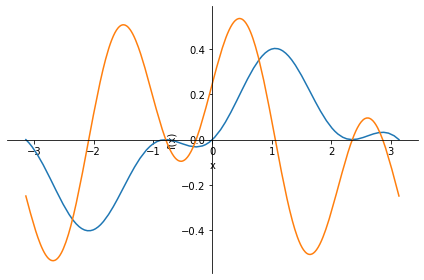

In [205]:
p1 = plot(y, (x , -pi, pi), show=False)
p2 = plot(y_diff,(x, -pi, pi), show=False)
p1.append(p2[0])
p1.show()

#### 5.Вычисляем вершину

In [214]:
diff_y_0 = extremum_light[1:-1]
index = 1
for i in diff_y_0:
    print(f' Вершина {index}: x = {i}, y = {round(y.subs(x,i).evalf(),2)}')
    index +=1

 Вершина 1: x = -2.08, y = -0.40
 Вершина 2: x = -0.79, y = 0.0
 Вершина 3: x = -0.27, y = -0.03
 Вершина 4: x = 1.06, y = 0.40
 Вершина 5: x = 2.36, y = 0.0
 Вершина 6: x = 2.87, y = 0.03


#### 6. Определяем промежутки, на котором f > 0

In [220]:
solveset(y>0, x, S.Reals)

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

#### 7. Определяем промежутки, на котором f < 0

In [221]:
solveset(y<0, x, S.Reals)

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))